In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Increase font size for readability
plt.rcParams.update({"font.size": 17})

# Load the data
bod_april6 = np.mean(np.genfromtxt("bod_april6.txt"), axis=0)
bod_april8 = np.genfromtxt("bod_april8.txt")
bod_april9 = np.genfromtxt("bod_april9.txt")

eod_april5 = np.genfromtxt("eod_april5.txt")
eod_april6 = np.genfromtxt("eod_april6.txt")
eod_april8 = np.genfromtxt("eod_april8.txt")

tot = np.vstack(
    [eod_april5, bod_april6, eod_april6, bod_april8, eod_april8, bod_april9]
)

CL_list = []
CD_list = []
CS_list = []
CMx_list = []
CMy_list = []
CMz_list = []
for day in tot:
    CL_list.append(day[1])
    CD_list.append(day[2])
    CS_list.append(day[3])
    CMx_list.append(day[4])
    CMy_list.append(day[5])
    CMz_list.append(day[6])

##
Fx_min = 80
Fx_max = 120
Fy_min = 1
Fy_max = 70
Fz_min = 600
Fz_max = 800
##
Mx_min = -100
Mx_max = 100
My_min = -70
My_max = 70
Mz_min = -60
Mz_max = 60


print(
    f"Fx: mean: {np.mean(CL_list):.2f}, std: {np.std(CL_list):.2f}, min: {Fx_min:.2f}, max: {Fx_max:.2f}"
)
print(
    f"Fy: mean: {np.mean(CD_list):.2f}, std: {np.std(CD_list):.2f}, min: {Fy_min:.2f}, max: {Fy_max:.2f}"
)
print(
    f"Fz: mean: {np.mean(CS_list):.2f}, std: {np.std(CS_list):.2f}, min: {Fz_min:.2f}, max: {Fz_max:.2f}"
)
print(
    f"Mx: mean: {np.mean(CMx_list):.2f}, std: {np.std(CMx_list):.2f}, min: {Mx_min:.2f}, max: {Mx_max:.2f}"
)
print(
    f"My: mean: {np.mean(CMy_list):.2f}, std: {np.std(CMy_list):.2f}, min: {My_min:.2f}, max: {My_max:.2f}"
)
print(
    f"Mz: mean: {np.mean(CMz_list):.2f}, std: {np.std(CMz_list):.2f}, min: {Mz_min:.2f}, max: {Mz_max:.2f}"
)

Fx: mean: 2.02, std: 1.99, min: 80.00, max: 120.00
Fy: mean: 3.17, std: 1.20, min: 1.00, max: 70.00
Fz: mean: 800.63, std: 0.45, min: 600.00, max: 800.00
Mx: mean: 3.09, std: 0.56, min: -100.00, max: 100.00
My: mean: 171.20, std: 1.65, min: -70.00, max: 70.00
Mz: mean: 0.29, std: 0.29, min: -60.00, max: 60.00


## Plotting

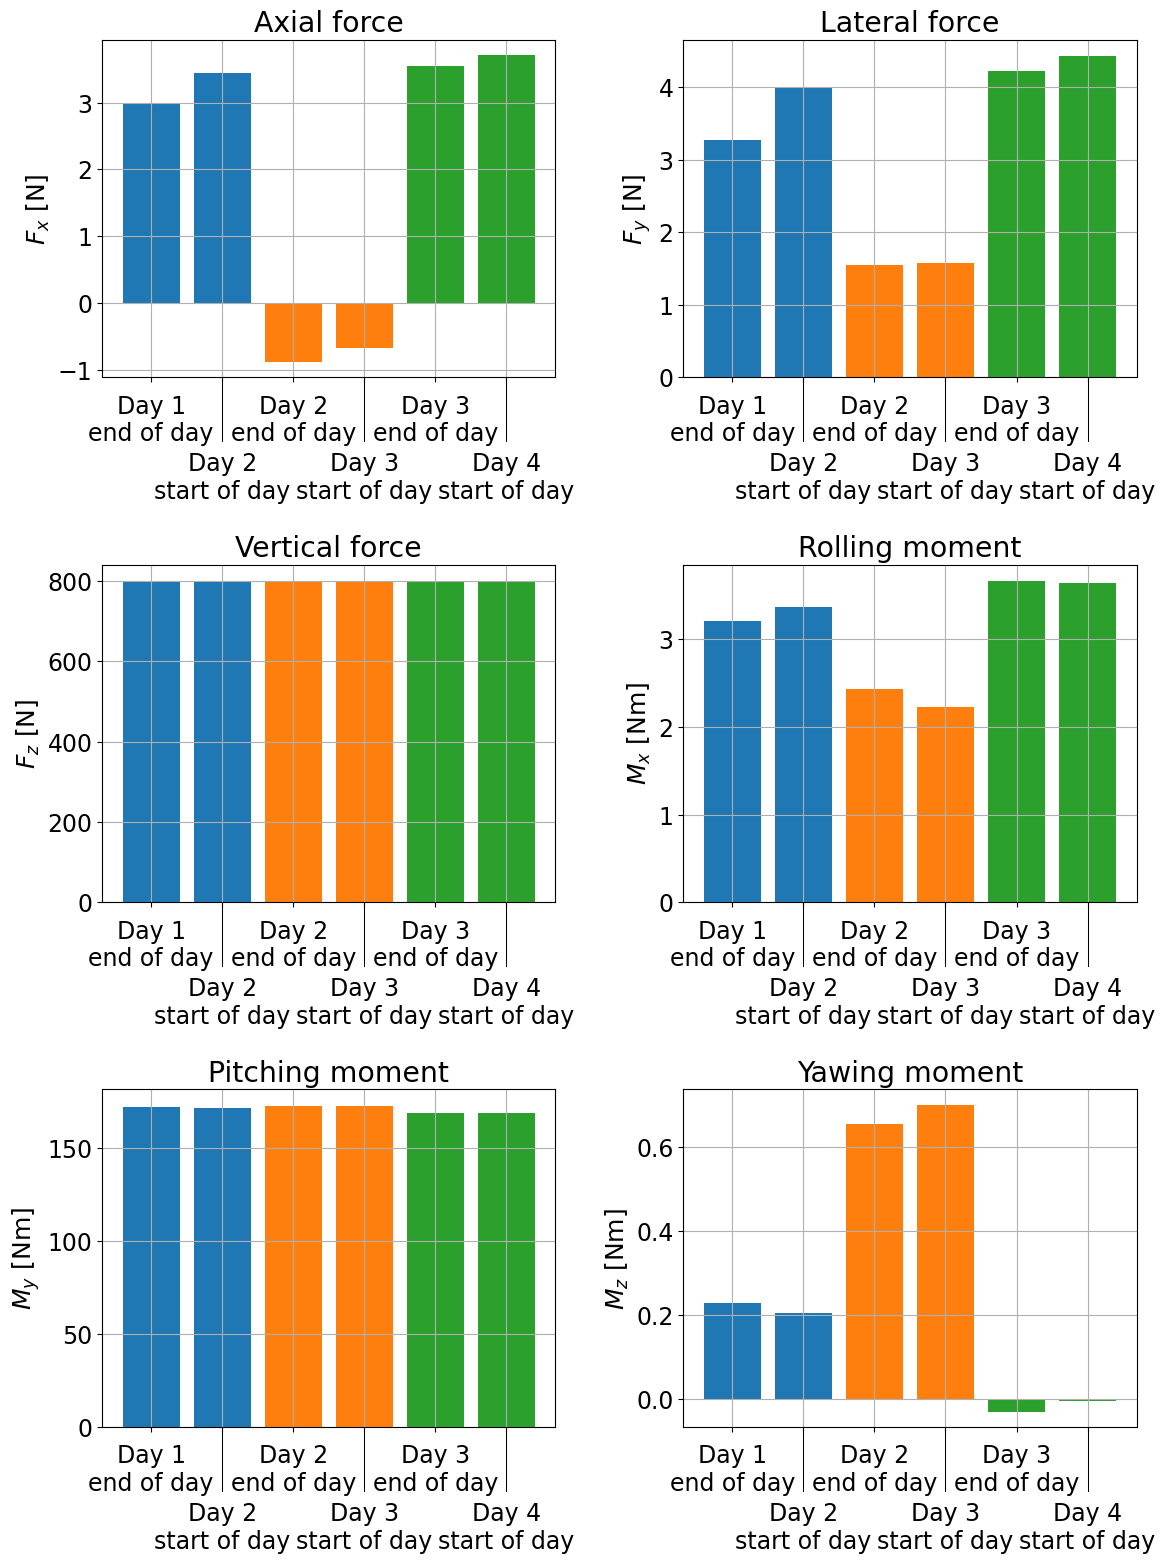

In [2]:
fig, axs = plt.subplots(3, 2, figsize=(12, 16))

# Flatten the subplot array for easier indexing
axs = axs.flatten()
ylabels = ["F_x", "F_y", "F_z", "M_x", "M_y", "M_z"]
units = ["N", "N", "N", "Nm", "Nm", "Nm"]
test = [
    "Day 1\nend of day",
    "Day 2\nstart of day",
    "Day 2\nend of day",
    "Day 3\nstart of day",
    "Day 3\nend of day",
    "Day 4\nstart of day",
]

# Define colors for the bars
colors = ["#1f77b4", "#1f77b4", "#ff7f0e", "#ff7f0e", "#2ca02c", "#2ca02c"]

# add plot titles
plot_titles = [
    "Axial force",
    "Lateral force",
    "Vertical force",
    "Rolling moment",
    "Pitching moment",
    "Yawing moment",
]

# Adjust the positions for the bars
x_positions = np.arange(len(test))

# Variable to control the position of the lower ticks
lower_tick_position = -0.22

for i in range(tot.shape[1] - 2):
    axs[i].bar(x_positions, tot[:, i + 1], color=colors)
    axs[i].set_xticks(x_positions)
    axs[i].set_xticklabels(["" for _ in range(len(test))], fontsize=18)
    axs[i].set_ylabel(rf"${ylabels[i]}$ [{units[i]}]", fontsize=18)
    axs[i].tick_params(axis="x", rotation=0)
    axs[i].grid()
    axs[i].set_title(plot_titles[i])
    # Custom x-tick labels with staggered positions and extended lines
    for j, label in enumerate(test):
        if j % 2 == 0:
            axs[i].text(
                j,
                -0.05,
                label,
                ha="center",
                va="top",
                transform=axs[i].get_xaxis_transform(),
            )
        else:
            axs[i].text(
                j,
                lower_tick_position,
                label,
                ha="center",
                va="top",
                transform=axs[i].get_xaxis_transform(),
            )
            axs[i].plot(
                [j, j],
                [0, lower_tick_position + 0.03],
                color="black",
                linewidth=0.75,
                transform=axs[i].get_xaxis_transform(),
                clip_on=False,
            )

# plt.suptitle('Plots visualizing possible sensor drift')
plt.tight_layout()
plt.savefig("sensordrift.pdf")
plt.show()